In [ ]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [ ]:
### Importing required libraries####
from PIL import Image

import numpy as np
import pandas as pd
import streamlit as st
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import GlobalMaxPool2D
from tensorflow.keras.preprocessing import image
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm
# from annoy import AnnoyIndex
import pickle
import os
from tqdm import tqdm
import cv2
import time
st.title('Ikea Products Recommender system')

2023-12-30 16:21:15.594 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

## Load the Precomputed Image Features:

In [ ]:
filenames = pickle.load(open(r'/content/drive/MyDrive/images-ikea-v2.pkl', 'rb'))
feature_list = pickle.load(open(r'/content/drive/MyDrive/fetaures-ikea-v2.pkl', 'rb'))


## Prepare the Data for KNN:

In [ ]:
# Method to preprocess the uploaded image
def image_preprocess(image_path, model):
    img = Image.open(image_path).convert("RGB")
    img = img.resize((224, 224))
    img_arr = np.array(img)
    ex_img_arr = np.expand_dims(img_arr, axis=0)
    pre_pr_img = preprocess_input(ex_img_arr)
    result = model.predict(pre_pr_img).flatten()
    normal_result = result / norm(result)
    return normal_result

In [ ]:
from sklearn.preprocessing import normalize

# Normalize features
normalized_features = normalize(feature_list)


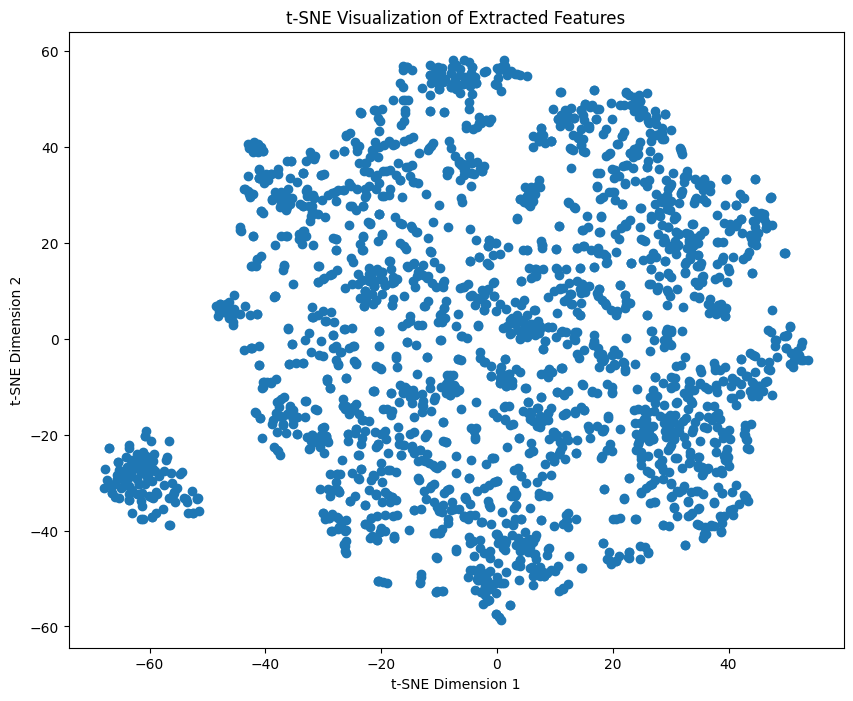

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# Assuming 'feature_list' contains the extracted features from ResNet50
normalized_features = normalize(feature_list)

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(normalized_features)

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(embedded_features[:, 0], embedded_features[:, 1])
plt.title('t-SNE Visualization of Extracted Features')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


## Apply KNN Algorithm:

### Set up the KNN model with different distance metrics

1/1 [==============================] - 0s 43ms/step


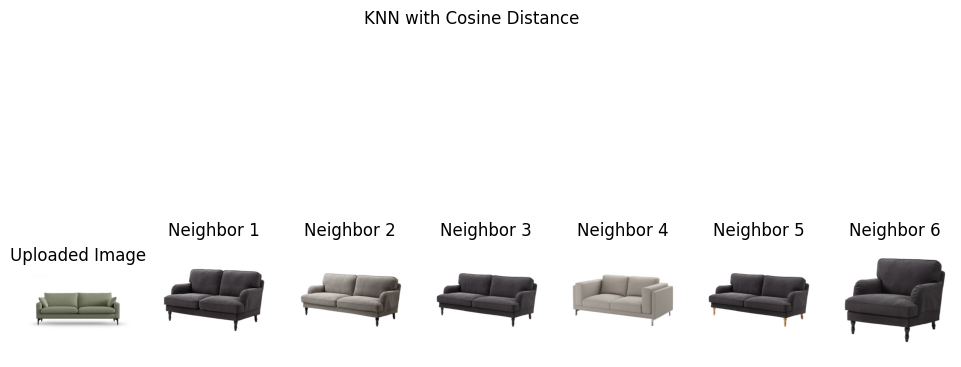

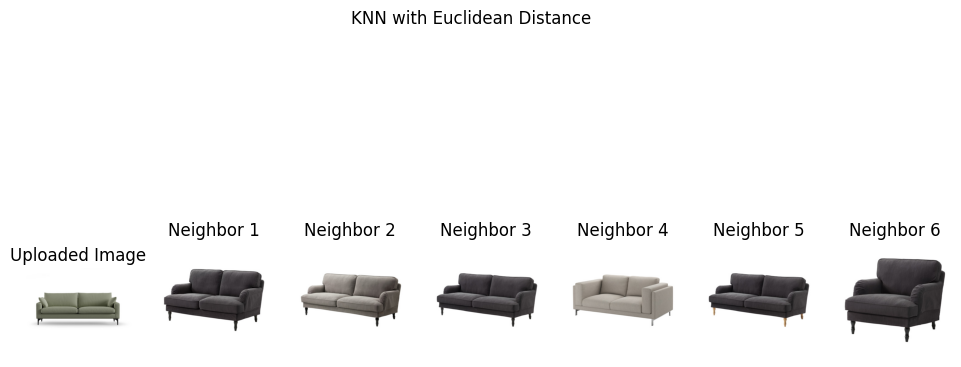

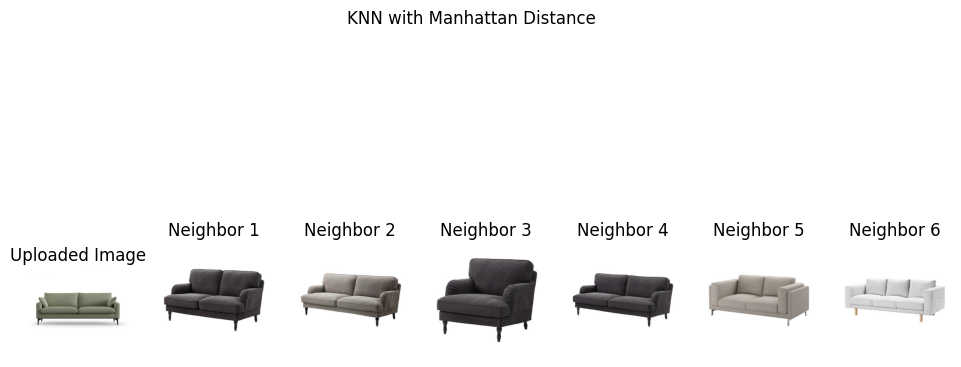

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Provide the path to the image file
image_path = "/content/sofa.jpg"

# Open the image using PIL
user_uploaded_image = Image.open(image_path)

# Preprocess the uploaded image
user_features = image_preprocess(image_path, model)

from sklearn.neighbors import NearestNeighbors

# Set up the KNN model with different distance metrics
distance_metrics = ['cosine', 'euclidean', 'manhattan']

# Display results for each distance metric
for metric in distance_metrics:
    # Set up the KNN model
    knn_model = NearestNeighbors(n_neighbors=6, algorithm='brute', metric=metric)
    knn_model.fit(normalized_features)

    # Find the nearest neighbors of the user-uploaded image
    distances, indices = knn_model.kneighbors([user_features])

    # Display original uploaded image and 6 nearest neighbors
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 7, 1)
    plt.imshow(np.array(user_uploaded_image))
    plt.title('Uploaded Image')
    plt.axis('off')

    for i in range(6):
        plt.subplot(1, 7, i+2)
        neighbor_image = Image.open(filenames[indices.flatten()[i]])
        plt.imshow(np.array(neighbor_image))
        plt.title(f'Neighbor {i+1}')
        plt.axis('off')

    plt.suptitle(f'KNN with {metric.capitalize()} Distance')
    plt.show()


1/1 [==============================] - 0s 27ms/step


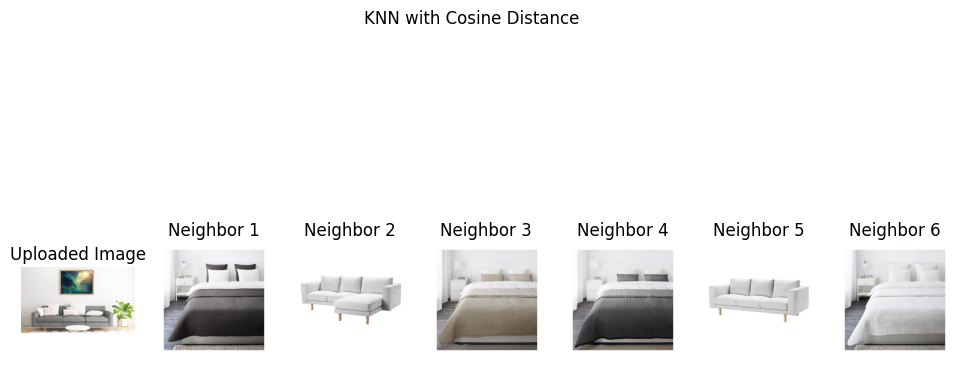

Average Cosine distance: 0.3393630261271903
----------------------------------------


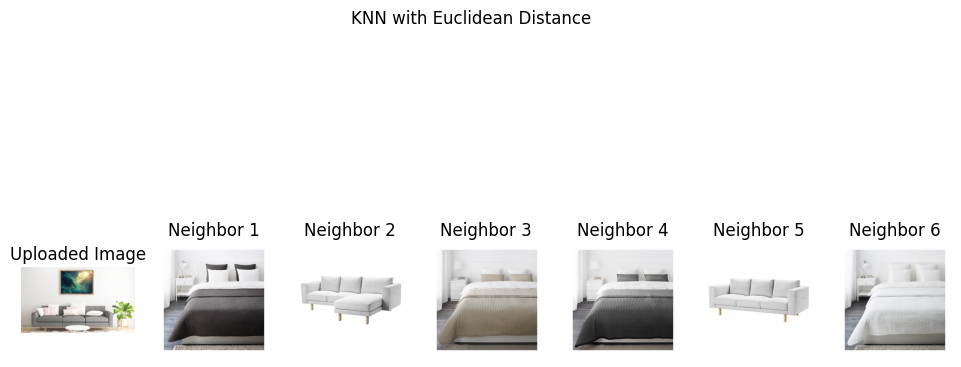

Average Euclidean distance: 0.8237924744458988
----------------------------------------


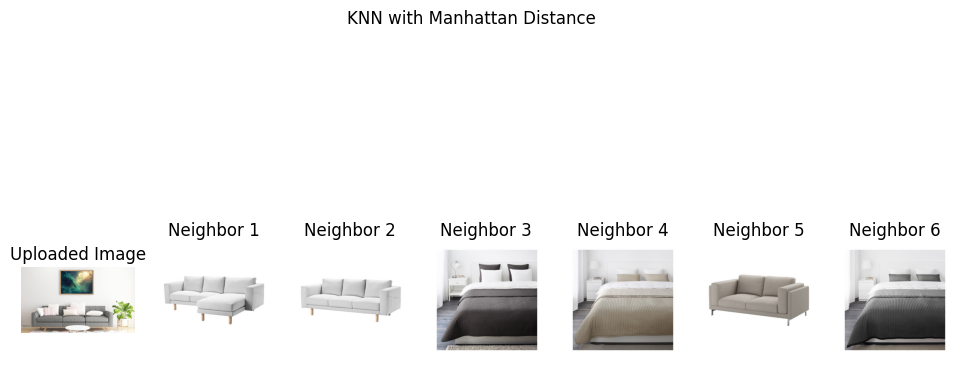

Average Manhattan distance: 24.91757860224527
----------------------------------------


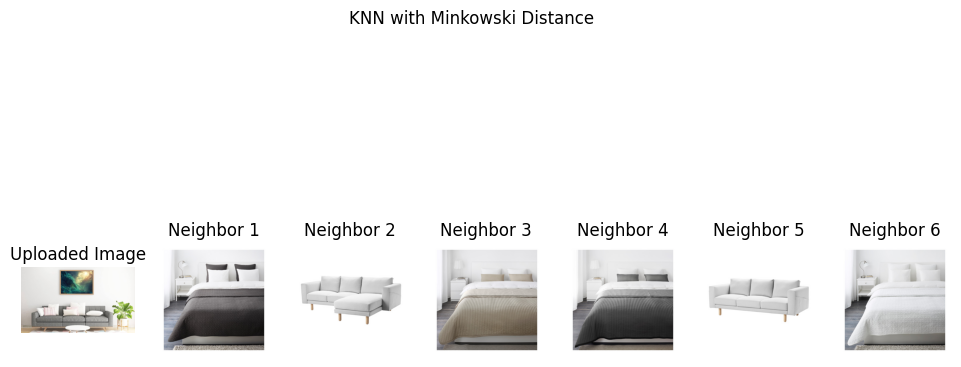

Average Minkowski distance: 0.8237924744458988
----------------------------------------


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Provide the path to the image file
image_path = "/content/sceen._AC_UF1000,1000_QL80_.jpg"

# Open the image using PIL
user_uploaded_image = Image.open(image_path)

# Preprocess the uploaded image
user_features = image_preprocess(image_path, model)

from sklearn.neighbors import NearestNeighbors

# Set up the KNN models with different distance metrics
distance_metrics = ['cosine', 'euclidean', 'manhattan', 'minkowski']

# Display results for each distance metric
for metric in distance_metrics:
    # Set up the KNN model
    knn_model = NearestNeighbors(n_neighbors=6, algorithm='brute', metric=metric)
    knn_model.fit(normalized_features)

    # Find the nearest neighbors of the user-uploaded image
    distances, indices = knn_model.kneighbors([user_features])

    # Display original uploaded image and 6 nearest neighbors
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 7, 1)
    plt.imshow(np.array(user_uploaded_image))
    plt.title('Uploaded Image')
    plt.axis('off')

    for i in range(6):
        plt.subplot(1, 7, i+2)
        neighbor_image = Image.open(filenames[indices.flatten()[i]])
        plt.imshow(np.array(neighbor_image))
        plt.title(f'Neighbor {i+1}')
        plt.axis('off')

    plt.suptitle(f'KNN with {metric.capitalize()} Distance')
    plt.show()

    # Optionally, you can include additional analysis here
    # For example, calculate and print average distance or other relevant metrics
    avg_distance = np.mean(distances)
    print(f'Average {metric.capitalize()} distance: {avg_distance}')
    print('-' * 40)


1/1 [==============================] - 4s 4s/step


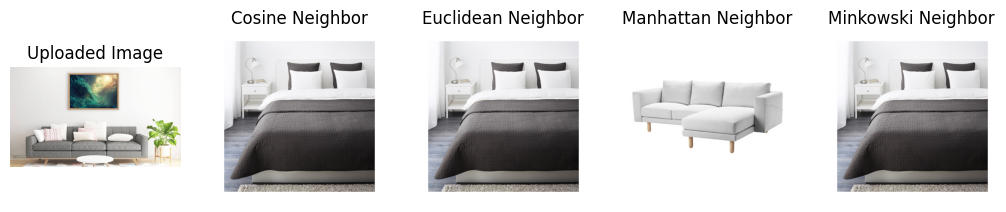

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Provide the path to the image file
image_path = "/content/sceen._AC_UF1000,1000_QL80_.jpg"

# Open the image using PIL
user_uploaded_image = Image.open(image_path)

# Preprocess the uploaded image
user_features = image_preprocess(image_path, model)

from sklearn.neighbors import NearestNeighbors

# Set up the KNN models with different distance metrics
distance_metrics = ['cosine', 'euclidean', 'manhattan', 'minkowski']

# Display original uploaded image
plt.figure(figsize=(18, 6))
plt.subplot(1, 7, 1)
plt.imshow(np.array(user_uploaded_image))
plt.title('Uploaded Image')
plt.axis('off')

# Display results for each distance metric
for i, metric in enumerate(distance_metrics):
    # Set up the KNN model
    knn_model = NearestNeighbors(n_neighbors=6, algorithm='brute', metric=metric)
    knn_model.fit(normalized_features)

    # Find the nearest neighbors of the user-uploaded image
    distances, indices = knn_model.kneighbors([user_features])

    # Display 6 nearest neighbors
    plt.subplot(1, 7, i+2)
    neighbor_image = Image.open(filenames[indices.flatten()[0]])
    plt.imshow(np.array(neighbor_image))
    plt.title(f'{metric.capitalize()} Neighbor')
    plt.axis('off')

plt.show()


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Set up the KNN model
knn_model = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='cosine')
knn_model.fit(normalized_features)


# Find the nearest neighbors of the user-uploaded image
distances, indices = knn_model.kneighbors([user_features])


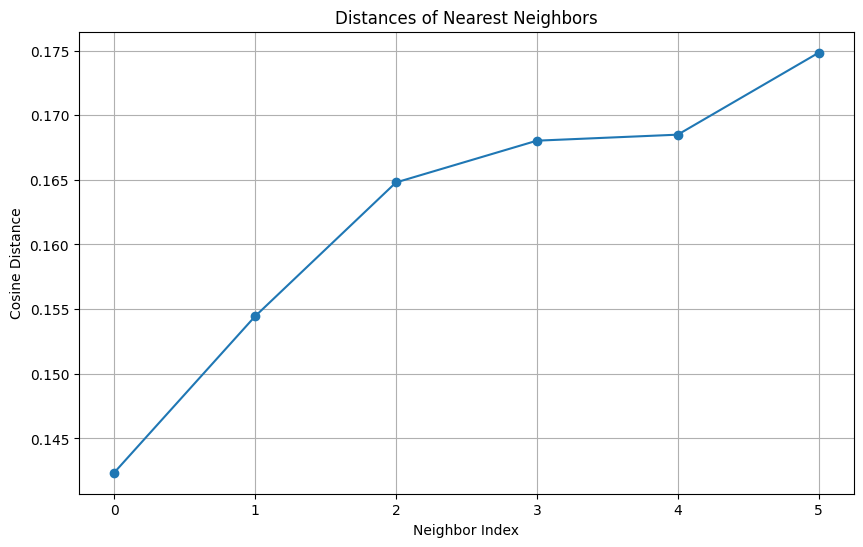

In [ ]:
import matplotlib.pyplot as plt

# Plot the distances of the nearest neighbors
plt.figure(figsize=(10, 6))
plt.plot(distances.flatten(), marker='o')
plt.title('Distances of Nearest Neighbors')
plt.xlabel('Neighbor Index')
plt.ylabel('Cosine Distance')
plt.grid(True)
plt.show()


 a simple line plot where the x-axis represents the index of the nearest neighbor, and the y-axis represents the cosine distance.

## Display the Recommendations:

This code uses subplots to display the original uploaded image and its 6 nearest neighbors side by side.

1/1 [==============================] - 0s 25ms/step


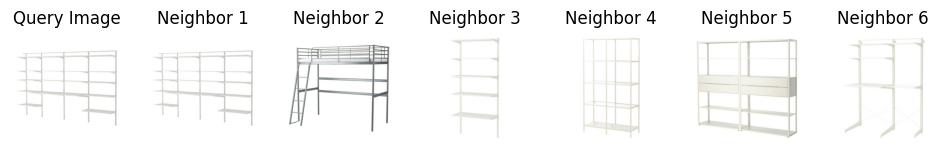

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from numpy.linalg import norm
from PIL import Image

# Load precomputed image features and filenames
filenames = pickle.load(open('/content/drive/MyDrive/images-ikea-v2.pkl', 'rb'))
feature_list = pickle.load(open('/content/drive/MyDrive/fetaures-ikea-v2.pkl', 'rb'))

# Normalize features
normalized_features = normalize(feature_list)

# Set up the KNN model
# knn_model = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='cosine')
knn_model = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
# knn_model = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='manhattan')
# knn_model = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='minkowski', p=2)
# knn_model = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='hamming')
knn_model.fit(normalized_features)

# Randomly select a query image
query_index = np.random.randint(len(filenames))
query_image_path = filenames[query_index]

# Preprocess the query image
query_features = image_preprocess(query_image_path, model)

# Find the nearest neighbors of the query image
distances, indices = knn_model.kneighbors([query_features])

# Display the query image and its nearest neighbors
plt.figure(figsize=(12, 6))

# Display query image
plt.subplot(1, 7, 1)
query_image = Image.open(query_image_path)
plt.imshow(np.array(query_image))
plt.title('Query Image')
plt.axis('off')

# Display 6 nearest neighbors
for i in range(6):
    plt.subplot(1, 7, i+2)
    neighbor_image_path = filenames[indices.flatten()[i]]
    neighbor_image = Image.open(neighbor_image_path)
    plt.imshow(np.array(neighbor_image))
    plt.title(f'Neighbor {i+1}')
    plt.axis('off')

plt.show()


## Full code using Streamlit

In [ ]:
%%writefile appv1.py
import streamlit as st
import os
import pickle
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
from PIL import Image
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm

# Load precomputed image features and filenames
filenames = pickle.load(open('/content/drive/MyDrive/images-ikea-v2.pkl', 'rb'))
feature_list = pickle.load(open('/content/drive/MyDrive/fetaures-ikea-v2.pkl', 'rb'))

model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

# Normalize features
normalized_features = normalize(feature_list)

# Method to save uploaded image into local
def Save_img(upload_img):
    try:
        with open(os.path.join('uploads', upload_img.name), 'wb') as f:
            f.write(upload_img.getbuffer())
        return 1
    except:
        return 0

# Method to preprocess the uploaded image
def image_preprocess(path, model):
    img = Image.open(path).convert("RGB")
    img = img.resize((224, 224))
    img_arr = np.array(img)
    ex_img_arr = np.expand_dims(img_arr, axis=0)
    pre_pr_img = preprocess_input(ex_img_arr)
    result = model.predict(pre_pr_img).flatten()
    normal_result = result / norm(result)
    return normal_result

# File uploader
upload_img = st.file_uploader("Choose an image", type=["jpg", "jpeg", "png"])

# Check if an image is uploaded
if upload_img is not None:
    # Save the uploaded image
    Save_img(upload_img)

    # Preprocess the user-uploaded image
    user_features = image_preprocess(upload_img, model)

    # Set up the KNN model
    knn_model = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='cosine')
    knn_model.fit(normalized_features)

    # Find the nearest neighbors of the user-uploaded image
    distances, indices = knn_model.kneighbors([user_features])

    # Display original uploaded image
    st.image(upload_img, caption="Original Uploaded Image", use_column_width=True)

    # Display recommended images horizontally
    recommended_images = [filenames[i] for i in indices.flatten()]

    # Create columns for each recommended image
    cols = st.columns(len(recommended_images))
    for i, col in enumerate(cols):
        col.image(recommended_images[i], caption=f"Recommended Image {i+1}", use_column_width=True)


Writing appv1.py


In [ ]:
!npm install localtunnel
!streamlit run appv1.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 4.809s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details
35.221.232.187
npx: installed 22 in 2.174s
your url is: https://tall-schools-like.loca.lt
/root/.npm/_npx/1110/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:40571 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/1110/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11